In [18]:
%load_ext sql
%sql sqlite:///oism-data.db
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
d = %sql select * from sales_info where status != "backordering" and status!= "concealed"
df = d.DataFrame()
df["order_datetime"] = df["datetime(order_datetime)"]
df["price"] = df["price"].astype(int)
df["rate"] = df["rate"].astype(float)
df["discounted_price"] = df["price"]*df["rate"]
df =df.drop(columns=["datetime(order_datetime)"])
df

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:///oism-data.db
Done.


,customer_id,item_code_ext,rate,status,item_name,material,price,order_datetime,discounted_price
0,eliad草纸,A2121PAC03091,1.0,shipped,リボンモチーフリング,樹脂 真鍮,6600,2021-12-31 14:55:00,6600.0
1,刘晓艳韩蕾,A2111PE_55091,1.0,shipped,PINK HOUSE×MISAKO&ERINKOキャットチェリードロッププリントルームワンピース,ポリエステル65% レーヨン35%,17600,2022-01-01 05:00:00,17600.0
2,murasaki46,A2113FS_24392,1.0,shipped,ネームワッペン使いプリーツティアードスカート,綿100％,28600,2021-12-17 05:00:00,28600.0
3,陈潇潇1026,A2121PAC03092,1.0,shipped,リボンモチーフリング,樹脂 真鍮,6600,2022-01-01 05:00:00,6600.0
4,livingday,A2321UCD01031,1.0,shipped,Puss in Boots 刺繍カーディガン,綿100%,37400,2022-01-01 05:00:00,37400.0
...,...,...,...,...,...,...,...,...,...
1383,arianne212010,A2123FA_16293,1.0,guaranteed,リボンプリントミディワンピース,綿100%,46200,2022-08-18 11:31:58,46200.0
1384,arianne212010,A2123UTR92093,1.0,guaranteed,little sunny bite×PINK HOUSE dog print sweat top,本体：綿85% ポリウレタン15% リブ：綿97% ポリウレタン3%,15180,2022-08-18 11:31:58,15180.0
1385,karenyipyip,A2121FA_90492,1.0,guaranteed,【予約】【PINK HOUSE × misako aoki 】セーラーカラーギンガムチェック...,綿100%,49500,2022-08-19 11:31:58,49500.0
1386,霸霸timq,A2121FAY90293,1.0,guaranteed,【予約】【PINK HOUSE × misako aoki 】sweets lop ear ...,綿100%,85800,2022-08-19 11:31:58,85800.0


In [19]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' #全体のフォントを設定
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams['font.size'] = 20 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 9 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 15

In [20]:
total_buy_df =df.groupby("customer_id")["discounted_price"].sum().rename_axis("customer_id").reset_index(name="total_buy").sort_values("total_buy",ascending=False)
sale_per_buy_df =df.groupby("customer_id")["discounted_price"].mean().rename_axis("customer_id").reset_index(name="sale_per_buy")
most_buy_customer_df =df["customer_id"].value_counts().rename_axis("customer_id").reset_index(name="counts")
res_df = total_buy_df.merge(sale_per_buy_df).merge(most_buy_customer_df)
res_df

,customer_id,total_buy,sale_per_buy,counts
0,塞万提斯ss,2032712.0,48397.904762,42
1,陈潇潇1026,1699830.0,33330.000000,51
2,幸福彩轮,1102090.0,26240.238095,42
3,yxrui313,827882.0,21227.743590,39
4,tb255243_99,726836.0,16151.911111,45
...,...,...,...,...
435,zhangjiayin1214,4752.0,4752.000000,1
436,薄学馆满七,4400.0,4400.000000,1
437,xinyumoruo,3960.0,1980.000000,2
438,ecureuilannie,3696.0,3696.000000,1


In [21]:
res_df.total_buy.mean()

101088.75

In [22]:
res_df= res_df[res_df["counts"]>2]

Text(0, 0.5, '总购买金额')

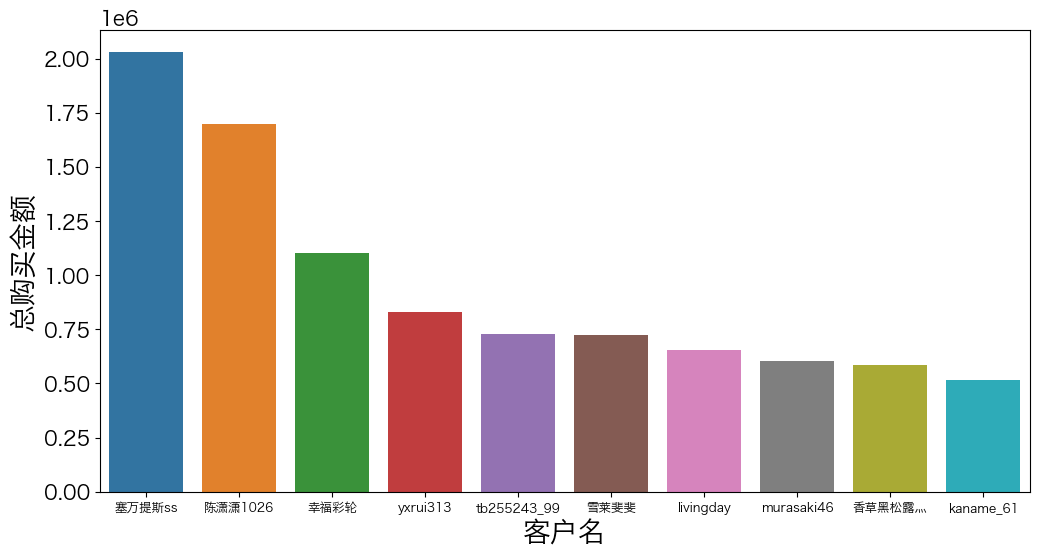

In [23]:
p =sns.barplot(x="customer_id",y="total_buy", data=res_df.head(10))
p.set_xlabel("客户名")
p.set_ylabel("总购买金额")

Text(0, 0.5, '购买商品数')

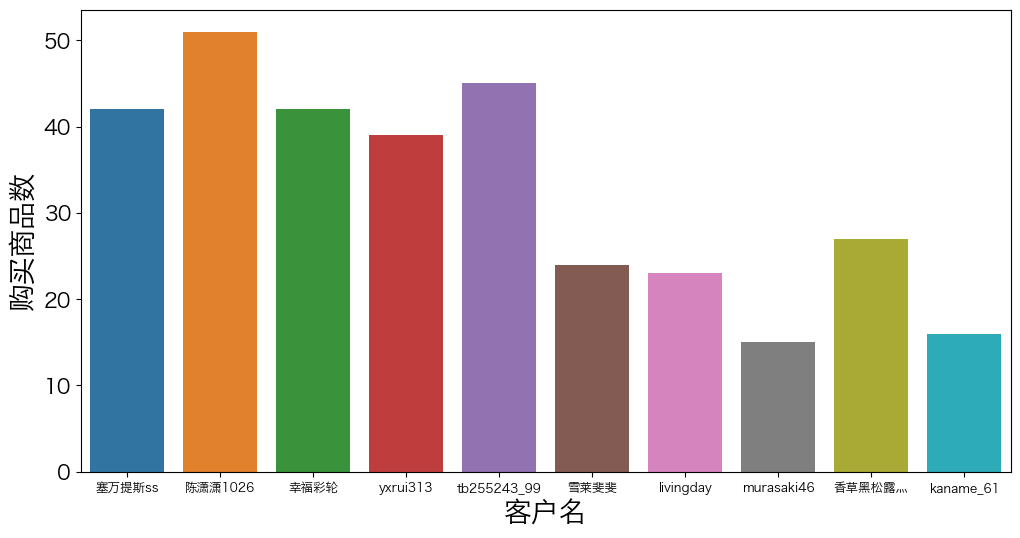

In [24]:
p =sns.barplot(x="customer_id",y="counts", data=res_df.head(10))
p.set_xlabel("客户名")
p.set_ylabel("购买商品数")

Text(0, 0.5, '平均购入金额')

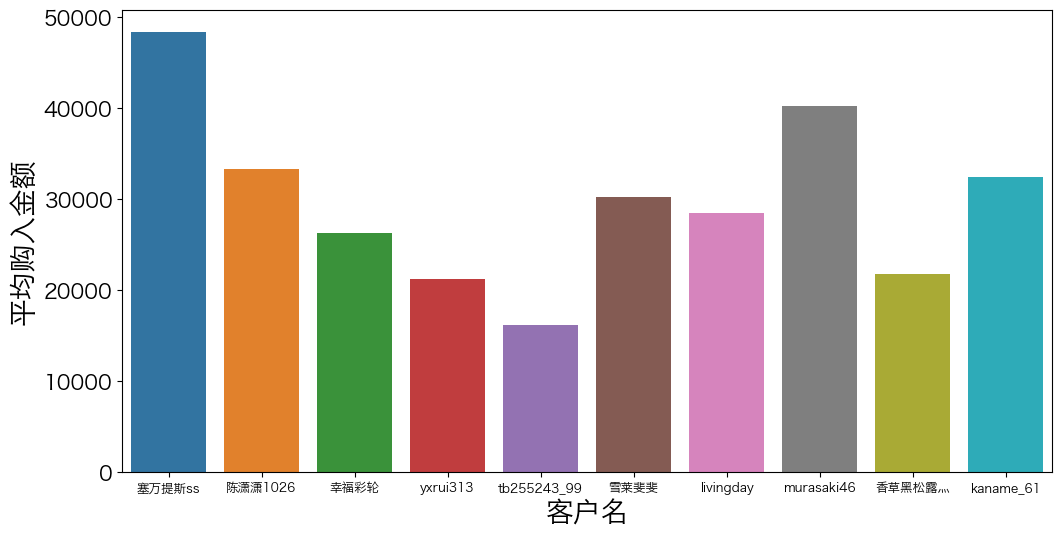

In [25]:
p =sns.barplot(x="customer_id",y="sale_per_buy", data=res_df.head(10))
p.set_xlabel("客户名")
p.set_ylabel("平均购入金额")

In [26]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['y'] >=10 or point['x']>= 50000:
            ax.text(point['x'], point['y']+1, point['val'],fontsize=10)

<AxesSubplot:title={'center':'淘宝店顾客消费(2022年1月～)'}, xlabel='平均消费金额', ylabel='购买件数'>

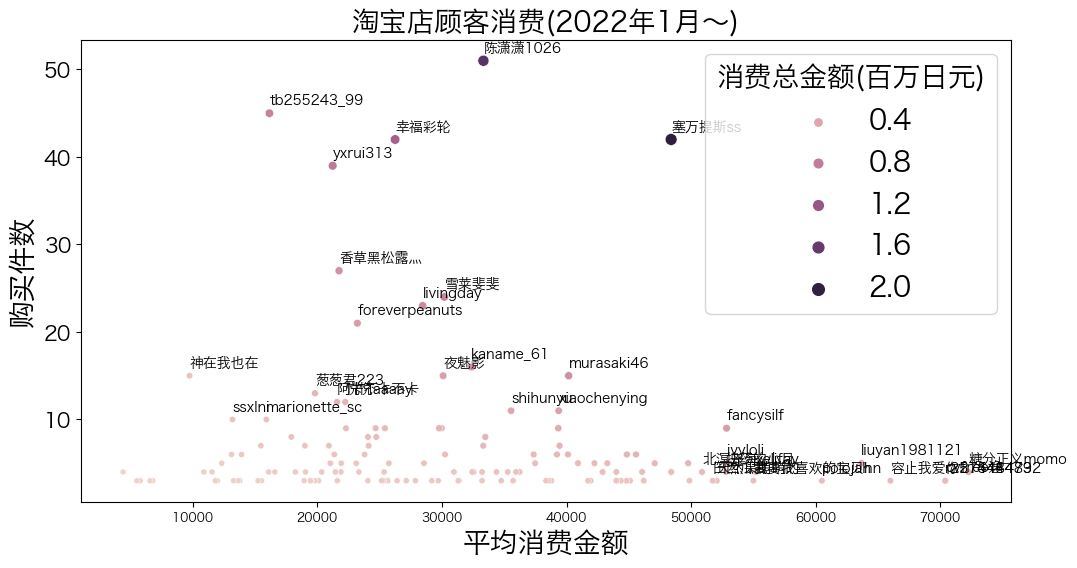

In [27]:
ax =sns.scatterplot(y="counts",x="sale_per_buy", hue="total_buy", size="total_buy" ,data=res_df)
ax.set_title("淘宝店顾客消费(2022年1月～)",fontsize=20)
ax.set_ylabel("购买件数")
ax.set_xlabel("平均消费金额")
ax.legend(title="消费总金额(百万日元)")
label_point(res_df.sale_per_buy,res_df.counts,res_df.customer_id,ax)
ax